<a href="https://www.kaggle.com/code/mhmdkardosha/simple-ml-model-on-englandweather-dataset?scriptVersionId=141347210" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### First, we start by importing the necessary libraries.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.filterwarnings("ignore")

# Set the maximum number of columns to be displayed
pd.set_option('display.max_columns', 50)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/englandweather20062016-preprocessing/EnglandWeather.csv


### Second, we read our data and take a look at it.

In [2]:
data = pd.read_csv('/kaggle/input/englandweather20062016-preprocessing/EnglandWeather.csv')
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Wind Speed (km/h),Pressure (millibars),Humidity
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,14.1197,1015.13,0.89
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,14.2646,1015.63,0.86
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,3.9284,1015.94,0.89
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,14.1036,1016.41,0.83
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,11.0446,1016.51,0.83


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Formatted Date        96453 non-null  object 
 1   Summary               96453 non-null  object 
 2   Precip Type           95936 non-null  object 
 3   Temperature (C)       96453 non-null  float64
 4   Wind Speed (km/h)     96453 non-null  float64
 5   Pressure (millibars)  96453 non-null  float64
 6   Humidity              96453 non-null  float64
dtypes: float64(4), object(3)
memory usage: 5.2+ MB


### Then we can do some EDA.

In [4]:

date = pd.DataFrame(list(data['Formatted Date'].str.split(' ')), columns=['1', '2', '3'])
date[['1']]

,1
0,2006-04-01
1,2006-04-01
2,2006-04-01
3,2006-04-01
4,2006-04-01
...,...
96448,2016-09-09
96449,2016-09-09
96450,2016-09-09
96451,2016-09-09


In [5]:
data['Formatted Date'] = date[['1']]
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Formatted Date        96453 non-null  datetime64[ns]
 1   Summary               96453 non-null  object        
 2   Precip Type           95936 non-null  object        
 3   Temperature (C)       96453 non-null  float64       
 4   Wind Speed (km/h)     96453 non-null  float64       
 5   Pressure (millibars)  96453 non-null  float64       
 6   Humidity              96453 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 5.2+ MB


In [7]:
data['Summary'].value_counts()

Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

In [8]:
data['Precip Type'].value_counts()

rain    85224
snow    10712
Name: Precip Type, dtype: int64

In [9]:
data.describe()

,Temperature (C),Wind Speed (km/h),Pressure (millibars),Humidity
count,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,10.810640,1003.235956,0.734899
std,9.551546,6.913571,116.969906,0.195473
min,-21.822222,0.000000,0.000000,0.000000
25%,4.688889,5.828200,1011.900000,0.600000
50%,12.000000,9.965900,1016.450000,0.780000
75%,18.838889,14.135800,1021.090000,0.890000
max,39.905556,63.852600,1046.380000,1.000000


In [10]:
data['Formatted Date'].value_counts()

2010-08-02    48
2013-10-27    25
2011-10-30    25
2006-10-29    25
2008-10-26    25
              ..
2008-03-30    23
2007-03-25    23
2011-03-27    23
2009-03-29    23
2014-07-14    21
Name: Formatted Date, Length: 4018, dtype: int64

In [11]:
data.rename(columns={"Formatted Date":"Date", 'Precip Type':'Target'}, inplace=True)

In [12]:
data.groupby('Date').mean()

,Temperature (C),Wind Speed (km/h),Pressure (millibars),Humidity
Date,,,,
2006-01-01,3.873148,21.372750,1012.279167,0.818333
2006-01-02,5.418519,17.551683,1010.131667,0.844583
2006-01-03,2.319444,8.417617,1020.805000,0.898333
2006-01-04,2.274074,11.579925,981.826667,0.905417
2006-01-05,2.698148,9.515100,935.988333,0.948333
...,...,...,...,...
2016-12-27,0.280324,10.980200,1020.304583,0.890000
2016-12-28,0.224306,10.969467,1020.334583,0.890000
2016-12-29,0.169676,10.892992,1020.365833,0.889583


In [13]:
data['year'] = data['Date'].dt.year

In [14]:
data.head()

,Date,Summary,Target,Temperature (C),Wind Speed (km/h),Pressure (millibars),Humidity,year
0,2006-04-01,Partly Cloudy,rain,9.472222,14.1197,1015.13,0.89,2006
1,2006-04-01,Partly Cloudy,rain,9.355556,14.2646,1015.63,0.86,2006
2,2006-04-01,Mostly Cloudy,rain,9.377778,3.9284,1015.94,0.89,2006
3,2006-04-01,Partly Cloudy,rain,8.288889,14.1036,1016.41,0.83,2006
4,2006-04-01,Mostly Cloudy,rain,8.755556,11.0446,1016.51,0.83,2006


<Axes: >

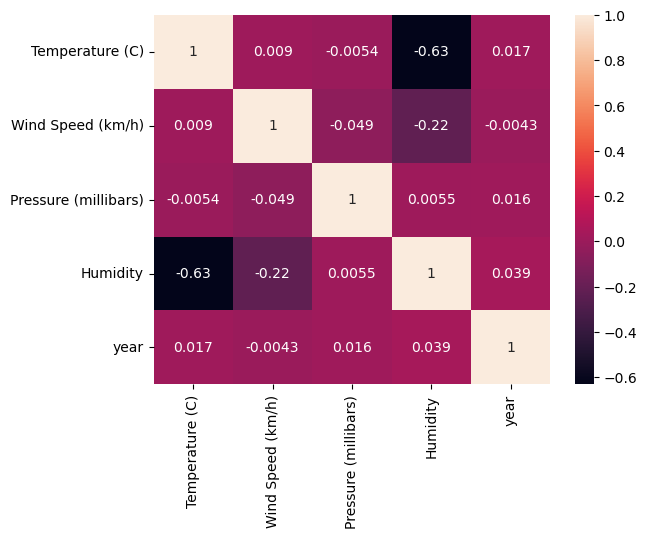

In [15]:
sns.heatmap(data.corr(), cmap = 'rocket', annot=True)

In [16]:
data.head()

,Date,Summary,Target,Temperature (C),Wind Speed (km/h),Pressure (millibars),Humidity,year
0,2006-04-01,Partly Cloudy,rain,9.472222,14.1197,1015.13,0.89,2006
1,2006-04-01,Partly Cloudy,rain,9.355556,14.2646,1015.63,0.86,2006
2,2006-04-01,Mostly Cloudy,rain,9.377778,3.9284,1015.94,0.89,2006
3,2006-04-01,Partly Cloudy,rain,8.288889,14.1036,1016.41,0.83,2006
4,2006-04-01,Mostly Cloudy,rain,8.755556,11.0446,1016.51,0.83,2006


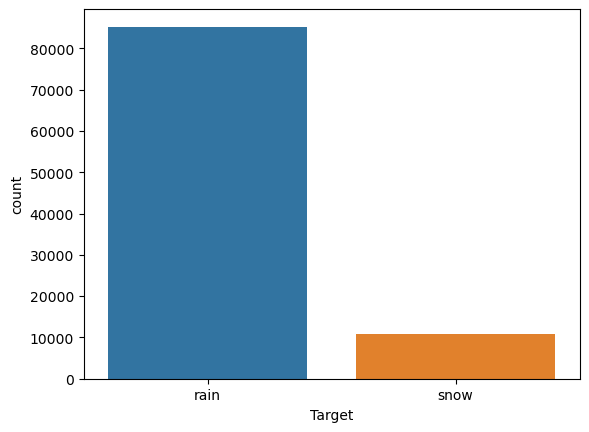

In [17]:
sns.countplot(data=data, x='Target')
plt.show()

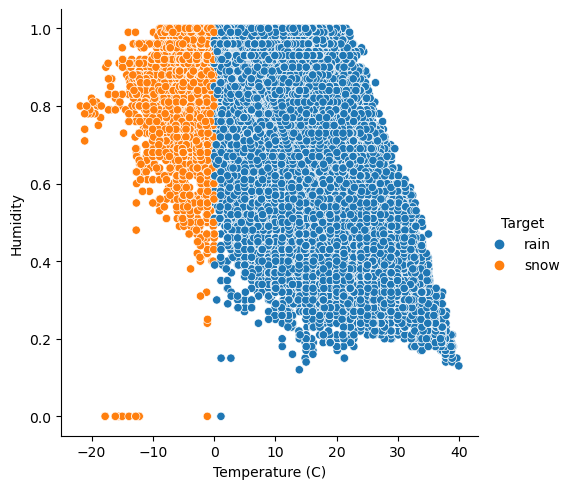

In [18]:
sns.relplot(data=data, x='Temperature (C)', y='Humidity', hue = 'Target')
plt.show()

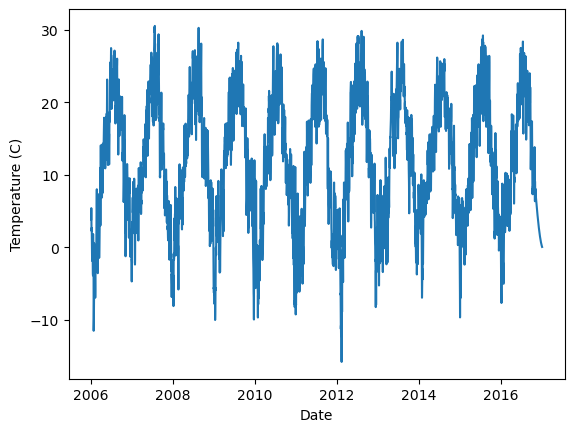

In [19]:
sns.lineplot(data=data.groupby('Date', as_index=False).mean(), x='Date', y='Temperature (C)', markers='o')
plt.show()

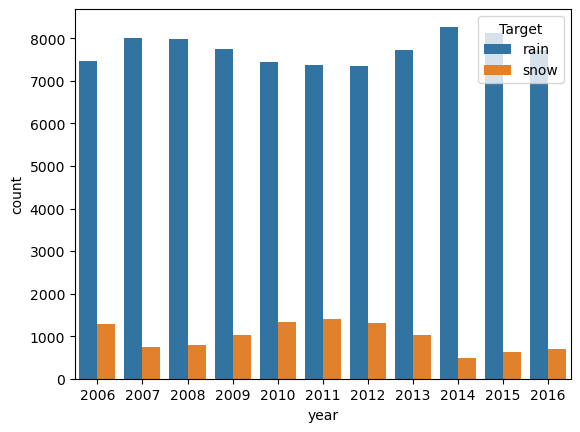

In [20]:
sns.countplot(data=data, x='year', hue='Target')
plt.show()

In [21]:
data_plot = data[["Temperature (C)", "Wind Speed (km/h)", "Pressure (millibars)", "Humidity", "Target"]]
data_plot

,Temperature (C),Wind Speed (km/h),Pressure (millibars),Humidity,Target
0,9.472222,14.1197,1015.13,0.89,rain
1,9.355556,14.2646,1015.63,0.86,rain
2,9.377778,3.9284,1015.94,0.89,rain
3,8.288889,14.1036,1016.41,0.83,rain
4,8.755556,11.0446,1016.51,0.83,rain
...,...,...,...,...,...
96448,26.016667,10.9963,1014.36,0.43,rain
96449,24.583333,10.0947,1015.16,0.48,rain
96450,22.038889,8.9838,1015.66,0.56,rain
96451,21.522222,10.5294,1015.95,0.60,rain


In [22]:
data['Pressure (millibars)'].value_counts()

0.00       1288
1017.70     123
1015.00     119
1018.00     118
1015.80     118
           ... 
998.75        1
1039.86       1
1042.97       1
1043.01       1
997.59        1
Name: Pressure (millibars), Length: 4979, dtype: int64

In [23]:
data['Target'] = data['Target'].apply(lambda x: 1 if x == 'rain' else 0)

In [24]:
data['Target'].value_counts()

1    85224
0    11229
Name: Target, dtype: int64

In [25]:
data = pd.get_dummies(data, columns = ['Summary'])
data

,Date,Target,Temperature (C),Wind Speed (km/h),Pressure (millibars),Humidity,year,Summary_Breezy,Summary_Breezy and Dry,Summary_Breezy and Foggy,Summary_Breezy and Mostly Cloudy,Summary_Breezy and Overcast,Summary_Breezy and Partly Cloudy,Summary_Clear,Summary_Dangerously Windy and Partly Cloudy,Summary_Drizzle,Summary_Dry,Summary_Dry and Mostly Cloudy,Summary_Dry and Partly Cloudy,Summary_Foggy,Summary_Humid and Mostly Cloudy,Summary_Humid and Overcast,Summary_Humid and Partly Cloudy,Summary_Light Rain,Summary_Mostly Cloudy,Summary_Overcast,Summary_Partly Cloudy,Summary_Rain,Summary_Windy,Summary_Windy and Dry,Summary_Windy and Foggy,Summary_Windy and Mostly Cloudy,Summary_Windy and Overcast,Summary_Windy and Partly Cloudy
0,2006-04-01,1,9.472222,14.1197,1015.13,0.89,2006,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2006-04-01,1,9.355556,14.2646,1015.63,0.86,2006,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,2006-04-01,1,9.377778,3.9284,1015.94,0.89,2006,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,2006-04-01,1,8.288889,14.1036,1016.41,0.83,2006,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2006-04-01,1,8.755556,11.0446,1016.51,0.83,2006,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09,1,26.016667,10.9963,1014.36,0.43,2016,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
96449,2016-09-09,1,24.583333,10.0947,1015.16,0.48,2016,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
96450,2016-09-09,1,22.038889,8.9838,1015.66,0.56,2016,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
96451,2016-09-09,1,21.522222,10.5294,1015.95,0.60,2016,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [26]:
data.columns

Index(['Date', 'Target', 'Temperature (C)', 'Wind Speed (km/h)',
       'Pressure (millibars)', 'Humidity', 'year', 'Summary_Breezy',
       'Summary_Breezy and Dry', 'Summary_Breezy and Foggy',
       'Summary_Breezy and Mostly Cloudy', 'Summary_Breezy and Overcast',
       'Summary_Breezy and Partly Cloudy', 'Summary_Clear',
       'Summary_Dangerously Windy and Partly Cloudy', 'Summary_Drizzle',
       'Summary_Dry', 'Summary_Dry and Mostly Cloudy',
       'Summary_Dry and Partly Cloudy', 'Summary_Foggy',
       'Summary_Humid and Mostly Cloudy', 'Summary_Humid and Overcast',
       'Summary_Humid and Partly Cloudy', 'Summary_Light Rain',
       'Summary_Mostly Cloudy', 'Summary_Overcast', 'Summary_Partly Cloudy',
       'Summary_Rain', 'Summary_Windy', 'Summary_Windy and Dry',
       'Summary_Windy and Foggy', 'Summary_Windy and Mostly Cloudy',
       'Summary_Windy and Overcast', 'Summary_Windy and Partly Cloudy'],
      dtype='object')

In [27]:
x = data.drop(['Target', 'Date'], axis = 1).values
y = data['Target'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=42)

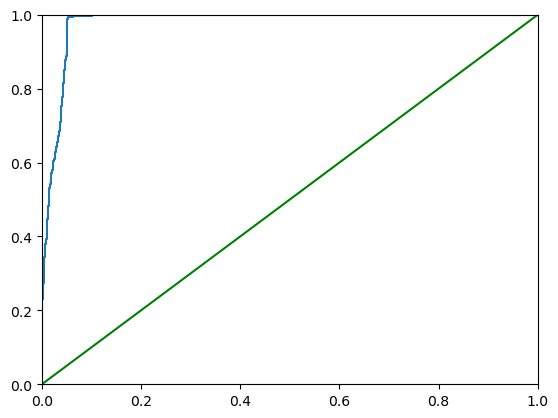

0.9791658574901809


0.9870614580741478

In [28]:
log = LogisticRegression(random_state=42)
log.fit(x_train, y_train)
pred_prob = log.predict_proba(x_test)
fpr, tpr, threshold = roc_curve(y_test, pred_prob[:,1])
plt.plot([0, 1], [0, 1], 'g')
plt.axis([0, 1, 0, 1])
plt.plot(fpr, tpr)
plt.show()
print(roc_auc_score(y_test, pred_prob[:,1]))
log.score(x_test, y_test)

In [29]:
def fitting_and_scoring(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    return model.score(x_test, y_test)

### Trying some models.

In [30]:
models = {'Logistic Regression':LogisticRegression(max_iter=1000, random_state=42),\
          'KNeighbors':KNeighborsClassifier(),\
          'Random Forest':RandomForestClassifier(random_state=42),\
          'Decision Tree':DecisionTreeClassifier(random_state = 42)}

In [31]:
for name, model in models.items():
    print("{} score: {}".format(name, fitting_and_scoring(model, x_train, y_train, x_test, y_test)))

Logistic Regression score: 0.9871029277598076
KNeighbors score: 0.9836194741643859
Random Forest score: 0.9961847889193
Decision Tree score: 0.995023637720826


In [32]:
# Scaling data
scaler =StandardScaler()
x_train_scaled =scaler.fit_transform(x_train)
x_test_scaled =scaler.transform(x_test)
print(np.mean(x_train), np.std(x_train))
print(np.mean(x_train_scaled), np.std(x_train_scaled))

94.96452053482095 386.3397060656153
1.1929331742731874e-14 0.9842509842515813


In [33]:
for name, model in models.items():
    model.fit(x_train_scaled, y_train)
    print("{} model accuracy of scaled data: {}".format(name, model.score(x_test_scaled, y_test)))

Logistic Regression model accuracy of scaled data: 0.9842000497636227
KNeighbors model accuracy of scaled data: 0.9781869453429543
Random Forest model accuracy of scaled data: 0.9961847889193
Decision Tree model accuracy of scaled data: 0.9950651074064859


### So there is no big difference with scaling data

In [34]:
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)
y_pred =rf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

<Axes: >

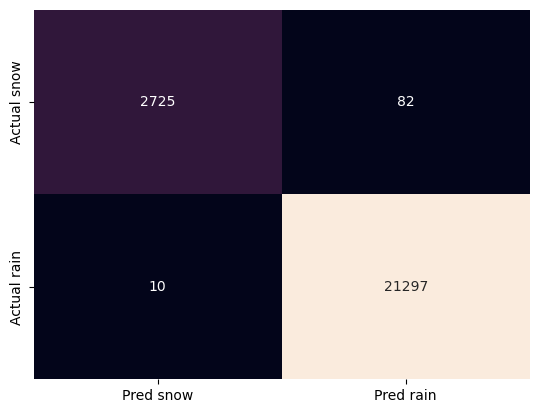

In [35]:
sns.heatmap(cm, annot = True, fmt="d", \
            xticklabels=["Pred snow", "Pred rain"], \
            yticklabels=["Actual snow", "Actual rain"], \
            cbar=False)

In [36]:
report = classification_report(y_test, y_pred, output_dict=True)
df = pd.DataFrame(report).transpose()
df.style.background_gradient(cmap="Blues")

,precision,recall,f1-score,support
0,0.996344,0.970787,0.983399,2807.000000
1,0.996164,0.999531,0.997845,21307.000000
accuracy,0.996185,0.996185,0.996185,0.996185
macro avg,0.996254,0.985159,0.990622,24114.000000
weighted avg,0.996185,0.996185,0.996163,24114.000000


 ### <p style="text-align: center;">I would appreciate your feedback and an upvote if you find it useful 😄.</p>